# Web Intelligence

## Decision Trees II

#### Prof. Claudio Lucchese

## Algorithm Sketch


BuildTree(${\cal D}$):
- BestSplit, BestGain = None
- For each feature $f$
   - For each threshold $t$
     - Let *Gain* be the goodness of the split $(f \leq t)$
     - If Gain>=BestGain:
       - BestGain = Gain
       - BestSplit = $(f \leq t)$
- If Gain is 0 or *other stopping criterion is met*:
   - Let $\mu$ be the best prediction for ${\cal D}$
   - Return $Leaf(\mu)$
- Let $f$ and $t$ be those of BestSplit = $(f \leq t)$
- Left Partition  ${\cal D}_L=\{x \in {\cal D} ~|~ x_f\leq t\}$
- Left Child $L$ = BuildTree(${\cal D}_L$)
- Right Partition ${\cal D}_R=\{x \in {\cal D} ~|~ x_f > t\}$
- Right Child $R$ = BuildTree(${\cal D}_R$)
- Return $Node(L,R)$


It is a greedy algorithm without backtracking that maximizes the Gain at every step.

## Driving Factor

We let the design of our algorithm be driven by the quality measure adopted.

For classification, we adopt **error** $E$, that is the fraction of misclassified instances.

## Regression


- Decision trees can be used also for regression problems.


- We must use the proper quality/cost function.


- For regression, the cost function is Mean Squared Error(MSE):

$$
Error(tree, {\cal D}) = MSE(tree, {\cal D}) =  \frac{1}{|{\cal D}|} \sum\limits_{(x,y)\in {\cal D}} (tree(x)- y)^2
$$


## Leaf Node

- Given a dataset ${\cal D}$ what is the best prediction we can have?

- $\mu = \arg\min MSE(\mu, {\cal D})\quad \Rightarrow\quad \mu =  \frac{1}{|{\cal D}|} \sum\limits_{(x,y)\in {\cal D}} y$

- for the regression task, it holds that $\mu$ must be the average value of the labels in ${\cal D}$

- Given $\mu$, we can write that total error on the dataset is:
$$
Error({\cal D}) =  \frac{1}{|{\cal D}|} \sum\limits_{(x,y)\in {\cal D}} (\mu - y)^2
$$

- Hereinafter we denote with $Error({\cal D})$ the error of the best prediction for dataset ${\cal D}$.


## Internal Node

- Given the pair $f \leq t$, we must determine the quality of this split.

- In general, assuming $Error$ is an average measure, we denote the gain of a split as the error reduction w.r.t. to not splitting the node.

$$
Gain(f,t~|~{\cal D}) = Error({\cal D}) - \frac{|{\cal D}_L|}{|{\cal D}|} Error({\cal D}_L) - \frac{|{\cal D}_R|}{|{\cal D}|} Error({\cal D}_R)
$$

- We would like Gain>0, note that Gain cannot decrease.


$$
Gain(f,t~|~{\cal D}) =
     \frac{1}{|{\cal D}|} \sum\limits_{(x,y)\in {\cal D}} (\mu - y)^2 - 
     \frac{|{\cal D}_L|}{|{\cal D}|} \frac{1}{|{\cal D}_L|} \sum\limits_{(x,y)\in {\cal D}_L} (\mu_L - y)^2  - 
     \frac{|{\cal D}_R|}{|{\cal D}|} \frac{1}{|{\cal D}_R|} \sum\limits_{(x,y)\in {\cal D}_R} (\mu_R - y)^2  
$$

simplify 

$$
Gain(f,t~|~{\cal D}) = \frac{1}{|{\cal D}|} \left(
     \sum\limits_{(x,y)\in {\cal D}} (\mu - y)^2 - 
     \sum\limits_{(x,y)\in {\cal D}_L} (\mu_L - y)^2  - 
     \sum\limits_{(x,y)\in {\cal D}_R} (\mu_R - y)^2  
     \right)
$$

compute squares

$$
Gain(f,t~|~{\cal D}) = \frac{1}{|{\cal D}|} \left(
     \sum\limits_{(x,y)\in {\cal D}} (\mu^2 + y^2 - 2y\mu) - 
     \sum\limits_{(x,y)\in {\cal D}_L} (\mu_L^2 + y^2 - 2y\mu_L)  - 
     \sum\limits_{(x,y)\in {\cal D}_R}(\mu_R^2 + y^2 - 2y\mu_R)
     \right)
$$

simplify $y^2$

$$
Gain(f,t~|~{\cal D}) = \frac{1}{|{\cal D}|} \left(
     \sum\limits_{(x,y)\in {\cal D}} (\mu^2 - 2y\mu) - 
     \sum\limits_{(x,y)\in {\cal D}_L} (\mu_L^2 - 2y\mu_L)  - 
     \sum\limits_{(x,y)\in {\cal D}_R}(\mu_R^2 - 2y\mu_R)
     \right)
$$

compute sums:

$$
Gain(f,t~|~{\cal D}) = \frac{1}{|{\cal D}|} \left(
     |{\cal D}|\mu^2 - 2\mu \sum\limits_{(x,y)\in {\cal D}} y \quad -
     |{\cal D}_L|\mu_L^2 + 2\mu_L \sum\limits_{(x,y)\in {\cal D}_L} y \quad  - 
     |{\cal D}_R|\mu_R^2 + 2\mu_R \sum\limits_{(x,y)\in {\cal D}_R} y
     \right)
$$


rewrite sum as mean multiplied by the number of elements

$$
Gain(f,t~|~{\cal D}) = \frac{1}{|{\cal D}|} \left(
     |{\cal D}|\mu^2 - 2\mu  |{\cal D}|\mu \quad -
     |{\cal D}_L|\mu_L^2 + 2\mu_L |{\cal D}_L| \mu_L\quad  - 
     |{\cal D}_R|\mu_R^2 + 2\mu_R  |{\cal D}_R| \mu_R
     \right)
$$


$$
Gain(f,t~|~{\cal D}) = \frac{1}{|{\cal D}|} \left(
     - |{\cal D}|\mu^2 + |{\cal D}_L|\mu_L^2 + |{\cal D}_R|\mu_R^2 
     \right)
$$


if we are interested in maximizing the Gain rather than computing its exact value, we can simplify multiplicative factors and constants independent of $f$ and $t$

$$
Gain(f,t~|~{\cal D}) \propto
    |{\cal D}_L|\mu_L^2 +|{\cal D}_R|\mu_R^2 
$$

$$
Gain(f,t~|~{\cal D}) \propto \frac{\left(\sum_{(x,y)\in {\cal D}_L} y\right)^2}{|{\cal D}_L|} 
+ \frac{\left(\sum_{(x,y)\in {\cal D}_R} y\right)^2}{|{\cal D}_R|}
$$

The best split is found by maximizing the above Gain.

## Implementation

Given $f$, computing the Gain for each possible threshold $t$ can be done efficiently as follows.

Suppose we have the following single-feature dataset:

In [2]:
import numpy as np

X_f = np.array( [1,3,6,4,2,7,9,9,0,1] )
y   = np.array( [1,1,1,2,2,3,3,3,1,1] )

Feature values can be sorted beforehand. Below we just get the sorting indices.

In [3]:
sorted_idx = np.argsort(X_f)

print ( X_f[sorted_idx] )
print ( y[sorted_idx])

[0 1 1 2 3 4 6 7 9 9]
[1 1 1 2 1 2 1 3 3 3]


At this point it is easy to identify ${\cal D}_L$ and ${\cal D}_R$ for every possible threshold.

We can easily compute $\sum_{(x,y)\in {\cal D}_L} y$ for every possible split as below.

While $\sum_{(x,y)\in {\cal D}_R} y$ can be computed by difference.

In [4]:
sum_y_L = np.cumsum( y[sorted_idx] )
sum_y_R = sum_y_L[-1] - sum_y_L
print (sum_y_L)
print (sum_y_R)

[ 1  2  3  5  6  8  9 12 15 18]
[17 16 15 13 12 10  9  6  3  0]


In [5]:
count_L = np.arange(1,len(y)+1)
count_R = len(y) - count_L
print (count_L)
print (count_R)

[ 1  2  3  4  5  6  7  8  9 10]
[9 8 7 6 5 4 3 2 1 0]


It is now easy to compute all the gains.

In [6]:
gains = sum_y_L**2/count_L + sum_y_R**2/count_R
print (gains)

[33.11111111 34.         35.14285714 34.41666667 36.         35.66666667
 38.57142857 36.         34.                 nan]


C:\Users\ricca\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


yes, the last point is not a real split.

**Note** that gain does not have a regular behavior, and therefore we cannot apply smart search strategies.

In [7]:
best_split = np.argmax(gains[:-1])
print ("best split pos = ", best_split)
print ("best threhold = ", X_f[sorted_idx][best_split])
print ("best split is X_f <=", X_f[sorted_idx][best_split])

best split pos =  6
best threhold =  6
best split is X_f <= 6


Typically, to improve robustness to noise, the actual threshold used in the tree is compute as follows.

As our goal is to separate ${\cal D}_L$ from ${\cal D}_R$, we can chose a threshold in the middle of the two.

In [8]:
best_split_threshold = ( X_f[sorted_idx][best_split] + X_f[sorted_idx][best_split+1] ) / 2
print ("best split is X_f <=", best_split_threshold )

best split is X_f <= 6.5


## Regression Problem

In [9]:
from sklearn.datasets import load_boston
data = load_boston()

In [10]:
print (data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [11]:
X = data.data
y = data.target

print (X.shape)
print (y.shape)
print (data.feature_names)

(506, 13)
(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


<IPython.core.display.Javascript object>


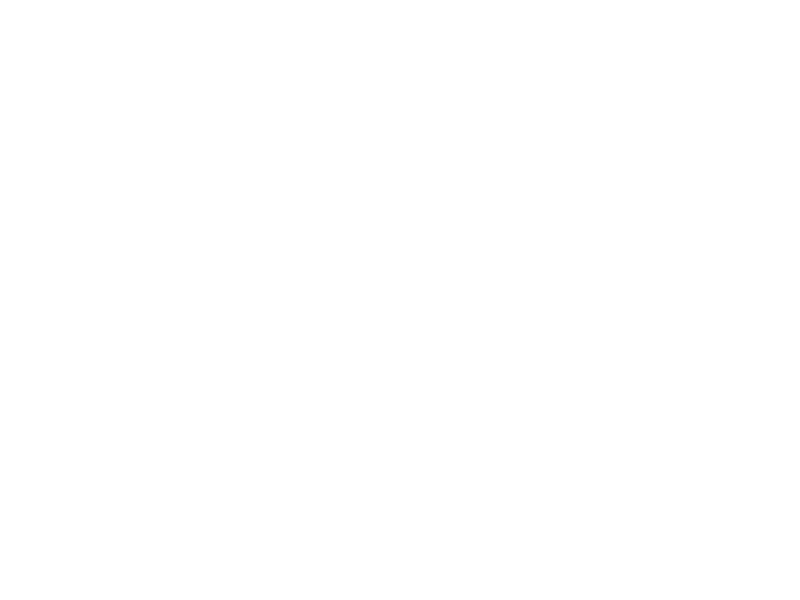

In [12]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

errors = []

for max_leaves in range(2,50):
    # train and predict
    dt = tree.DecisionTreeRegressor(max_leaf_nodes=max_leaves)
    dt.fit(X_train,y_train)

    # compute Accuracy
    train_acc = mean_squared_error(y_true=y_train, y_pred=dt.predict(X_train))
    test_acc = mean_squared_error(y_true=y_test, y_pred=dt.predict(X_test))

    errors += [ [max_leaves, train_acc, test_acc] ]

errors = np.array(errors)

fig, ax = plt.subplots()
ax.plot(errors[:,0], errors[:,1], "x:", label="Train")
ax.plot(errors[:,0], errors[:,2], "o-", label="Test")
ax.set_ylabel("MSE")
ax.set_xlabel("Number of Leaves")
ax.grid()
ax.legend()




In [13]:
# Train a linear regression

from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

reg_train_err = mean_squared_error(y_true=y_train, y_pred=reg.predict(X_train))
reg_test_err = mean_squared_error(y_true=y_test, y_pred=reg.predict(X_test))


<IPython.core.display.Javascript object>


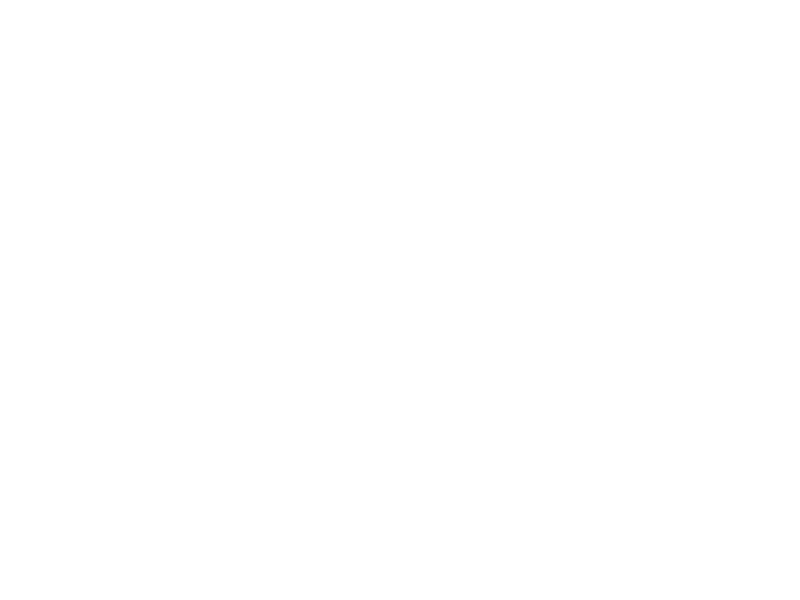

In [14]:
# Comparison plot

fig, ax = plt.subplots()
ax.plot(errors[:,0], errors[:,1], "x:", label="DT Train")
ax.plot(errors[:,0], errors[:,2], "o-", label="DT Test")
ax.axhline(y=reg_train_err, c='red', ls="--", label="Reg Train")
ax.axhline(y=reg_test_err, c='green', ls="--", label="Reg Test")
ax.set_ylabel("MSE")
ax.grid()
ax.legend()

## Thyroid dataset classification problem

- Url: http://archive.ics.uci.edu/ml/datasets/thyroid+disease

Thyroid disease records supplied by the Garavan Institute and J. Ross
Quinlan, New South Wales Institute, Syndney, Australia.

    hyperthyroid, T3 toxic, goitre, secondary toxic,
    negative.			|  classes

    age:				continuous.
    sex:				M, F.
    on thyroxine:			f, t.
    query on thyroxine:		f, t.
    on antithyroid medication:	f, t.
    sick:				f, t.
    pregnant:			f, t.
    thyroid surgery:		f, t.
    I131 treatment:			f, t.
    query hypothyroid:		f, t.
    query hyperthyroid:		f, t.
    lithium:			f, t.
    goitre:				f, t.
    tumor:				f, t.
    hypopituitary:			f, t.
    psych:				f, t.
    TSH measured:			f, t.
    TSH:				continuous.
    T3 measured:			f, t.
    T3:				continuous.
    TT4 measured:			f, t.
    TT4:				continuous.
    T4U measured:			f, t.
    T4U:				continuous.
    FTI measured:			f, t.
    FTI:				continuous.
    TBG measured:			f, t.
    TBG:				continuous.
    referral source:		WEST, STMW, SVHC, SVI, SVHD, other.

In [15]:
import numpy as np
import pandas as pd


# download the file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/allhyper.data"
dataset = pd.read_csv(url, comment="|", header=None)
# try removing comment and header params

In [16]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative.
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative.
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative.
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative.
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative.
5,18,F,t,f,f,f,f,f,f,f,...,t,183,t,1.3,t,141,f,?,other,negative.
6,59,F,f,f,f,f,f,f,f,f,...,t,72,t,0.92,t,78,f,?,other,negative.
7,80,F,f,f,f,f,f,f,f,f,...,t,80,t,0.7,t,115,f,?,SVI,negative.
8,66,F,f,f,f,f,f,f,f,f,...,t,123,t,0.93,t,132,f,?,SVI,negative.
9,68,M,f,f,f,f,f,f,f,f,...,t,83,t,0.89,t,93,f,?,SVI,negative.


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 30 columns):
0     2800 non-null object
1     2800 non-null object
2     2800 non-null object
3     2800 non-null object
4     2800 non-null object
5     2800 non-null object
6     2800 non-null object
7     2800 non-null object
8     2800 non-null object
9     2800 non-null object
10    2800 non-null object
11    2800 non-null object
12    2800 non-null object
13    2800 non-null object
14    2800 non-null object
15    2800 non-null object
16    2800 non-null object
17    2800 non-null object
18    2800 non-null object
19    2800 non-null object
20    2800 non-null object
21    2800 non-null object
22    2800 non-null object
23    2800 non-null object
24    2800 non-null object
25    2800 non-null object
26    2800 non-null object
27    2800 non-null object
28    2800 non-null object
29    2800 non-null object
dtypes: object(30)
memory usage: 656.3+ KB


In [18]:
dataset.describe().T

,count,unique,top,freq
0,2800,94,59,75
1,2800,3,F,1830
2,2800,2,f,2470
3,2800,2,f,2760
4,2800,2,f,2766
5,2800,2,f,2690
6,2800,2,f,2759
7,2800,2,f,2761
8,2800,2,f,2752
9,2800,2,f,2637


In [19]:
num_inst, num_features = dataset.shape

for f in range(num_features):
    print (f, np.unique(dataset.iloc[:,f]))

0 ['1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21' '22'
 '23' '24' '25' '26' '27' '28' '29' '30' '31' '32' '33' '34' '35' '36'
 '37' '38' '39' '4' '40' '41' '42' '43' '44' '45' '455' '46' '47' '48'
 '49' '5' '50' '51' '52' '53' '54' '55' '56' '57' '58' '59' '6' '60' '61'
 '62' '63' '64' '65' '66' '67' '68' '69' '7' '70' '71' '72' '73' '74' '75'
 '76' '77' '78' '79' '8' '80' '81' '82' '83' '84' '85' '86' '87' '88' '89'
 '90' '91' '92' '93' '94' '?']
1 ['?' 'F' 'M']
2 ['f' 't']
3 ['f' 't']
4 ['f' 't']
5 ['f' 't']
6 ['f' 't']
7 ['f' 't']
8 ['f' 't']
9 ['f' 't']
10 ['f' 't']
11 ['f' 't']
12 ['f' 't']
13 ['f' 't']
14 ['f' 't']
15 ['f' 't']
16 ['f' 't']
17 ['0.005' '0.01' '0.015' '0.02' '0.025' '0.03' '0.035' '0.04' '0.045'
 '0.05' '0.055' '0.06' '0.065' '0.07' '0.08' '0.09' '0.1' '0.12' '0.13'
 '0.14' '0.15' '0.16' '0.17' '0.19' '0.2' '0.21' '0.22' '0.23' '0.24'
 '0.25' '0.26' '0.27' '0.28' '0.29' '0.3' '0.31' '0.32' '0.33' '0.34'
 '0.35' '0.36' '0.37' '0.38' '0.39' '0.4

### Issues with this data

1. Binary categorical features
1. k-nary categorical features
1. k-nary categorical class label
1. features with unique values
1. missing values

### Strategies:

1. Binary categorical features
   - map to 0-1
1. k-nary categorical features
   - one-hot-encoding, ie., one binary variable for each possible value
1. k-nary categorical class label
   - map to numerical id
1. features with unique values
   - remove (home work)
1. missing values
   - replace with mean if numerical
   - replace with mode if categorical
   - add binary feature (we will use this strategy)

## Extract X

In [20]:
# drop label columns
X = dataset.drop(columns=[29])

X.describe().T

,count,unique,top,freq
0,2800,94,59,75
1,2800,3,F,1830
2,2800,2,f,2470
3,2800,2,f,2760
4,2800,2,f,2766
5,2800,2,f,2690
6,2800,2,f,2759
7,2800,2,f,2761
8,2800,2,f,2752
9,2800,2,f,2637


## Handle numerical features

In [21]:
# heuristic strategy for categorical vs. numerical variables
is_numerical = [ len(np.unique(X[col]))>10 for col in X ]
numerical_idx =  np.flatnonzero(is_numerical) 

In [22]:
print (is_numerical)
print (numerical_idx)
print ("Number of numerical features:", sum(is_numerical))

[True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, True, False, True, False, True, False, False, False]
[ 0 17 19 21 23 25]
Number of numerical features: 6


In [23]:
# convert numerical to floats (keep NaN)
X[ numerical_idx ] = X[ numerical_idx ].apply(pd.to_numeric, errors='coerce')

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 29 columns):
0     2799 non-null float64
1     2800 non-null object
2     2800 non-null object
3     2800 non-null object
4     2800 non-null object
5     2800 non-null object
6     2800 non-null object
7     2800 non-null object
8     2800 non-null object
9     2800 non-null object
10    2800 non-null object
11    2800 non-null object
12    2800 non-null object
13    2800 non-null object
14    2800 non-null object
15    2800 non-null object
16    2800 non-null object
17    2516 non-null float64
18    2800 non-null object
19    2215 non-null float64
20    2800 non-null object
21    2616 non-null float64
22    2800 non-null object
23    2503 non-null float64
24    2800 non-null object
25    2505 non-null float64
26    2800 non-null object
27    2800 non-null object
28    2800 non-null object
dtypes: float64(6), object(23)
memory usage: 634.5+ KB


In [25]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,41.0,F,f,f,f,f,f,f,f,f,...,2.5,t,125.0,t,1.14,t,109.0,f,?,SVHC
1,23.0,F,f,f,f,f,f,f,f,f,...,2.0,t,102.0,f,NaN,f,NaN,f,?,other
2,46.0,M,f,f,f,f,f,f,f,f,...,NaN,t,109.0,t,0.91,t,120.0,f,?,other
3,70.0,F,t,f,f,f,f,f,f,f,...,1.9,t,175.0,f,NaN,f,NaN,f,?,other
4,70.0,F,f,f,f,f,f,f,f,f,...,1.2,t,61.0,t,0.87,t,70.0,f,?,SVI


In [26]:
# extract NaNs
X[numerical_idx].isna().astype(int).head()

,0,17,19,21,23,25
0,0,0,0,0,0,0
1,0,0,0,0,1,1
2,0,0,1,0,0,0
3,0,0,0,0,1,1
4,0,0,0,0,0,0


In [27]:
X = pd.concat([X, X[numerical_idx].isna().astype(int)], 
               axis=1)

X.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,0,17,19,21,23,25
0,41.0,F,f,f,f,f,f,f,f,f,...,109.0,f,?,SVHC,0,0,0,0,0,0
1,23.0,F,f,f,f,f,f,f,f,f,...,NaN,f,?,other,0,0,0,0,1,1
2,46.0,M,f,f,f,f,f,f,f,f,...,120.0,f,?,other,0,0,1,0,0,0
3,70.0,F,t,f,f,f,f,f,f,f,...,NaN,f,?,other,0,0,0,0,1,1
4,70.0,F,f,f,f,f,f,f,f,f,...,70.0,f,?,SVI,0,0,0,0,0,0


In [28]:
X.shape

(2800, 35)

In [29]:
# fill NaN
X = X.fillna(0.0)
# try with mean/median

X.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,0,17,19,21,23,25
0,41.0,F,f,f,f,f,f,f,f,f,...,109.0,f,?,SVHC,0,0,0,0,0,0
1,23.0,F,f,f,f,f,f,f,f,f,...,0.0,f,?,other,0,0,0,0,1,1
2,46.0,M,f,f,f,f,f,f,f,f,...,120.0,f,?,other,0,0,1,0,0,0
3,70.0,F,t,f,f,f,f,f,f,f,...,0.0,f,?,other,0,0,0,0,1,1
4,70.0,F,f,f,f,f,f,f,f,f,...,70.0,f,?,SVI,0,0,0,0,0,0


## One-hot encoding for the remaining features

 - see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies

In [30]:
pd.get_dummies(X).head(10).T

,0,1,2,3,4,5,6,7,8,9
0,41.00,23.0,46.00,70.00,70.00,18.00,59.00,80.0,66.00,68.00
17,1.30,4.1,0.98,0.16,0.72,0.03,0.00,2.2,0.60,2.40
19,2.50,2.0,0.00,1.90,1.20,0.00,0.00,0.6,2.20,1.60
21,125.00,102.0,109.00,175.00,61.00,183.00,72.00,80.0,123.00,83.00
23,1.14,0.0,0.91,0.00,0.87,1.30,0.92,0.7,0.93,0.89
25,109.00,0.0,120.00,0.00,70.00,141.00,78.00,115.0,132.00,93.00
0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
17,0.00,0.0,0.00,0.00,0.00,0.00,1.00,0.0,0.00,0.00
19,0.00,0.0,1.00,0.00,0.00,1.00,1.00,0.0,0.00,0.00
21,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00


In [31]:
X = pd.get_dummies(X)

X.head()

,0,17,19,21,23,25,0,17,19,21,...,22_t,24_f,24_t,26_f,27_?,28_STMW,28_SVHC,28_SVHD,28_SVI,28_other
0,41.0,1.30,2.5,125.0,1.14,109.0,0,0,0,0,...,1,0,1,1,1,0,1,0,0,0
1,23.0,4.10,2.0,102.0,0.00,0.0,0,0,0,0,...,0,1,0,1,1,0,0,0,0,1
2,46.0,0.98,0.0,109.0,0.91,120.0,0,0,1,0,...,1,0,1,1,1,0,0,0,0,1
3,70.0,0.16,1.9,175.0,0.00,0.0,0,0,0,0,...,0,1,0,1,1,0,0,0,0,1
4,70.0,0.72,1.2,61.0,0.87,70.0,0,0,0,0,...,1,0,1,1,1,0,0,0,1,0


In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 60 columns):
0           2800 non-null float64
17          2800 non-null float64
19          2800 non-null float64
21          2800 non-null float64
23          2800 non-null float64
25          2800 non-null float64
0           2800 non-null int32
17          2800 non-null int32
19          2800 non-null int32
21          2800 non-null int32
23          2800 non-null int32
25          2800 non-null int32
1_?         2800 non-null uint8
1_F         2800 non-null uint8
1_M         2800 non-null uint8
2_f         2800 non-null uint8
2_t         2800 non-null uint8
3_f         2800 non-null uint8
3_t         2800 non-null uint8
4_f         2800 non-null uint8
4_t         2800 non-null uint8
5_f         2800 non-null uint8
5_t         2800 non-null uint8
6_f         2800 non-null uint8
6_t         2800 non-null uint8
7_f         2800 non-null uint8
7_t         2800 non-null uint8
8_f         2800 

## Extract y

Some libraries might be able to handle string class labels, while some other libraries may require to have integer IDs.

Also you might be willing to transform string labels into integers also for some features of a given dataset (instead of using one-hot-encoding).
For instance, does it make sense to use one-hot encoding for the feature 24 above, which is either true or false?

Below we introduce label encoding for any possible future use, but we will feed out classifier directly with the raw string labels.

In [33]:
# isolate target label
y_raw = dataset[29]

In [34]:
y_raw

0           negative.
1           negative.
2           negative.
3           negative.
4           negative.
5           negative.
6           negative.
7           negative.
8           negative.
9           negative.
10          negative.
11          negative.
12          negative.
13          negative.
14          negative.
15          negative.
16          negative.
17          negative.
18          negative.
19          negative.
20          negative.
21          negative.
22          negative.
23          negative.
24          negative.
25      hyperthyroid.
26          negative.
27          negative.
28          negative.
29          negative.
            ...      
2770    hyperthyroid.
2771        negative.
2772        negative.
2773        negative.
2774        negative.
2775        negative.
2776        negative.
2777        negative.
2778        negative.
2779        negative.
2780        negative.
2781        negative.
2782        negative.
2783        negative.
2784      

In [35]:
y_raw.value_counts()

negative.        2723
hyperthyroid.      62
T3 toxic.           8
goitre.             7
Name: 29, dtype: int64

In [36]:
print ("Majority class accuracy:", 
        y_raw.value_counts().max()/y_raw.value_counts().sum())


Majority class accuracy: 0.9725


This is the accuracy of the naive classifier always predicting class 'Negative'.

In [37]:
from sklearn.preprocessing import LabelEncoder
# now encode target labels
label_enc = LabelEncoder()
y = label_enc.fit_transform(y_raw)

In [38]:
y

array([3, 3, 3, ..., 3, 3, 3])

In [39]:
label_enc.inverse_transform( [0,1,2,3] )

array(['T3 toxic.', 'goitre.', 'hyperthyroid.', 'negative.'], dtype=object)

## Run the training

In [40]:
%matplotlib notebook

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def accuracies_vary_max_leaves(X_train, X_valid, X_test, y_train, y_valid, y_test,
                              l_min=2, l_max=50, l_step=1):

    accuracies = []

    for max_leaves in range(l_min,l_max, l_step):
        # train and predict
        dt = DecisionTreeClassifier(max_leaf_nodes=max_leaves)
        dt.fit(X_train,y_train)

        # compute Accuracy
        train_acc = accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
        valid_acc = accuracy_score(y_true=y_valid, y_pred=dt.predict(X_valid))
        test_acc  = accuracy_score(y_true=y_test,  y_pred=dt.predict(X_test))

        accuracies += [ [max_leaves, train_acc, valid_acc, test_acc] ]

    accuracies = np.array(accuracies)

    fig, ax = plt.subplots()
    ax.plot(accuracies[:,0], accuracies[:,1], "x:", label="Train")
    ax.plot(accuracies[:,0], accuracies[:,2], "o-", label="Valid")
    ax.plot(accuracies[:,0], accuracies[:,3], "s-", label="Test")
    ax.legend()
    ax.grid()
    fig.show()
    
    return accuracies

In [41]:
from sklearn.model_selection import train_test_split

X_train_0, X_test, y_train_0, y_test = train_test_split( X, y_raw, 
                                                         test_size=0.20)
X_train, X_valid, y_train, y_valid = train_test_split( X_train_0, y_train_0, 
                                                         test_size=0.25)


accuracies_vary_max_leaves(X_train, X_valid, X_test, 
                           y_train, y_valid, y_test)

<IPython.core.display.Javascript object>

array([[ 2.        ,  0.97738095,  0.98392857,  0.96964286],
       [ 3.        ,  0.98511905,  0.98928571,  0.97678571],
       [ 4.        ,  0.98690476,  0.98928571,  0.97857143],
       [ 5.        ,  0.98869048,  0.99285714,  0.98035714],
       [ 6.        ,  0.98869048,  0.99285714,  0.98035714],
       [ 7.        ,  0.99107143,  0.99107143,  0.98214286],
       [ 8.        ,  0.9922619 ,  0.98928571,  0.98214286],
       [ 9.        ,  0.9922619 ,  0.98928571,  0.98214286],
       [10.        ,  0.99404762,  0.9875    ,  0.98392857],
       [11.        ,  0.99464286,  0.9875    ,  0.98392857],
       [12.        ,  0.9952381 ,  0.9875    ,  0.98392857],
       [13.        ,  0.99583333,  0.9875    ,  0.98392857],
       [14.        ,  0.99642857,  0.9875    ,  0.98392857],
       [15.        ,  0.99702381,  0.9875    ,  0.98392857],
       [16.        ,  0.99702381,  0.9875    ,  0.98392857],
       [17.        ,  0.99761905,  0.9875    ,  0.98392857],
       [18.        ,  0.

In [42]:
from sklearn.metrics import confusion_matrix, classification_report

dt = DecisionTreeClassifier(max_leaf_nodes=27)
dt.fit(X_train,y_train)

train_acc = accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
valid_acc = accuracy_score(y_true=y_valid, y_pred=dt.predict(X_valid))
test_acc  = accuracy_score(y_true=y_test,  y_pred=dt.predict(X_test))

print ("Train Acc:", train_acc)
print ("Valid Acc:", valid_acc)
print ("Test Acc :", test_acc)

Train Acc: 1.0
Valid Acc: 0.9875
Test Acc : 0.9857142857142858


## Can we investigate more the decision tree performance?

### Confusion Matrix

In [43]:
conf_stat = confusion_matrix(y_true=y_test, y_pred=dt.predict(X_test))

# This is a powerful plotting lib !!!
import seaborn as sns

fig, ax = plt.subplots(figsize=(5,5), tight_layout=True)
sns.heatmap(conf_stat, annot=True, fmt=".3f", 
            linewidths=.5, square = True, 
            cmap = 'Blues_r',cbar=False,
            xticklabels=dt.classes_,
            yticklabels=dt.classes_);
ax.set_ylabel('True Label', fontsize=14);
ax.set_xlabel('Predicted Label', fontsize=14);

<IPython.core.display.Javascript object>

## Accuracy Measures

Accuracy is defined as the fraction of correctly classified instances.

Especially with imbalanced data, accuracy may not be the best measure.

Rather, we can define different measure for each class. Precision, Recall and F-measure are very common

 - **Precision of class c**: $\frac{\mbox{# instances correctly classified as $c$}}{\mbox{# instances predicted as class $c$}}$ 
 - **Recall of class c**: $\frac{\mbox{# instances correctly classified as $c$}}{\mbox{# instances with true label $c$}}$  
 - **F-measure**: harmonic mean of Precision and Recall $\frac{2\times\mbox{Precision}\times\mbox{Recall}}{\mbox{Precision}+\mbox{Recall}}$  
 - **$F_\beta$ weighted F-measure**: $\frac{(1+\beta^2)\times\mbox{Precision}\times\mbox{Recall}}{\beta^2\times\mbox{Precision}+\mbox{Recall}}$ 

For most measure we are interested in their average across classes, e.g., average precision, average recall.

We are interested in two main ways of computing the average:
 - **Macro**: statistics are computed independently for each class, and their average is taken:
   - macro-recall is the average of the recall values measured for each single class
 - **Weighted**: like macro, but weighted by class size (support). 
   - Classes with more instances have a larger impact on the final measure
   - provided by scikit learn, but not commonly used. 

### Classification report

In [44]:
# see https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report
class_rep = classification_report(y_true=y_test, y_pred=dt.predict(X_test))

print (class_rep)

               precision    recall  f1-score   support

    T3 toxic.       0.67      0.67      0.67         3
      goitre.       1.00      1.00      1.00         2
hyperthyroid.       0.92      0.69      0.79        16
    negative.       0.99      1.00      0.99       539

     accuracy                           0.99       560
    macro avg       0.89      0.84      0.86       560
 weighted avg       0.99      0.99      0.98       560



## Cost sensitive

An interesting option is **Cost-Sensitive** Learning. The entries of the confusion metrics are associated with misclassification costs. When computing accuracy, the reward/penalty of correct/incorrect classification is not +1/-1 but the cost expressed in the cost matrix. 
 - This is not discussed further here, and it is not supported by scikit-learn.
 
 
 

## Let's give a weight to the various instances

In [45]:
def accuracies_vary_max_leaves(X_train, X_valid, X_test, y_train, y_valid, y_test,
                               weights=None,
                               l_min=2, l_max=50, l_step=1):

    accuracies = []

    for max_leaves in range(l_min,l_max, l_step):
        # train and predict
        dt = DecisionTreeClassifier( class_weight=weights,
                                     max_leaf_nodes=max_leaves)
        dt.fit(X_train,y_train)

        # compute Accuracy
        train_acc = accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
        valid_acc = accuracy_score(y_true=y_valid, y_pred=dt.predict(X_valid))
        test_acc  = accuracy_score(y_true=y_test,  y_pred=dt.predict(X_test))

        accuracies += [ [max_leaves, train_acc, valid_acc, test_acc] ]

    accuracies = np.array(accuracies)

    fig, ax = plt.subplots()
    ax.plot(accuracies[:,0], accuracies[:,1], "x:", label="Train")
    ax.plot(accuracies[:,0], accuracies[:,2], "o-", label="Valid")
    ax.plot(accuracies[:,0], accuracies[:,3], "s-", label="Test")
    ax.legend()
    ax.grid()
    fig.show()
    
    return accuracies

### Exercise: try different weights below

In [46]:
weights = {'negative.':1, 'hyperthyroid.':100, 'T3 toxic.':100, 'goitre.':100}
accs = accuracies_vary_max_leaves(X_train, X_valid, X_test, y_train, y_valid, y_test,
                           weights=weights,
                           l_min=5, l_max=50)

print (max(accs, key=lambda x:x[-1]))

<IPython.core.display.Javascript object>

[10.          0.99345238  0.98392857  0.98392857]


In [47]:
from sklearn.metrics import confusion_matrix, classification_report

dt = DecisionTreeClassifier(class_weight=weights,
                                 max_leaf_nodes=21)
dt.fit(X_train,y_train)

train_acc = accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
valid_acc = accuracy_score(y_true=y_valid, y_pred=dt.predict(X_valid))
test_acc  = accuracy_score(y_true=y_test,  y_pred=dt.predict(X_test))

print ("Train Acc:", train_acc)
print ("Valid Acc:", valid_acc)
print ("Test Acc :", test_acc)

class_rep = classification_report(y_true=y_test, y_pred=dt.predict(X_test))
print (class_rep)

conf_stat = confusion_matrix(y_true=y_test, y_pred=dt.predict(X_test))

import seaborn as sns
fig, ax = plt.subplots(figsize=(5,5), tight_layout=True)
sns.heatmap(conf_stat, annot=True, fmt=".3f", 
            linewidths=.5, square = True, 
            cmap = 'Blues_r',cbar=False,
            xticklabels=dt.classes_,
            yticklabels=dt.classes_);
ax.set_ylabel('True Label', fontsize=14);
ax.set_xlabel('Predicted Label', fontsize=14);

Train Acc: 0.9994047619047619
Valid Acc: 0.9892857142857143
Test Acc : 0.9839285714285714
               precision    recall  f1-score   support

    T3 toxic.       0.33      0.33      0.33         3
      goitre.       1.00      0.50      0.67         2
hyperthyroid.       0.88      0.88      0.88        16
    negative.       0.99      0.99      0.99       539

     accuracy                           0.98       560
    macro avg       0.80      0.68      0.72       560
 weighted avg       0.98      0.98      0.98       560



<IPython.core.display.Javascript object>

Make weights inversely proportinal to frequency.

In [48]:
accs = accuracies_vary_max_leaves(X_train, X_valid, X_test, 
                                  y_train, y_valid, y_test,
                                  weights="balanced",
                                  l_min=5, l_max=50)

print (max(accs, key=lambda x:x[1])) # max on validation

<IPython.core.display.Javascript object>

[20.          1.          0.98392857  0.98392857]


In [49]:
from sklearn.metrics import confusion_matrix, classification_report

dt = DecisionTreeClassifier(class_weight="balanced",
                                 max_leaf_nodes=29)
dt.fit(X_train,y_train)

train_acc = accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
valid_acc = accuracy_score(y_true=y_valid, y_pred=dt.predict(X_valid))
test_acc  = accuracy_score(y_true=y_test,  y_pred=dt.predict(X_test))

print ("Train Acc:", train_acc)
print ("Valid Acc:", valid_acc)
print ("Test Acc :", test_acc)

class_rep = classification_report(y_true=y_test, y_pred=dt.predict(X_test))
print (class_rep)

conf_stat = confusion_matrix(y_true=y_test, y_pred=dt.predict(X_test))

import seaborn as sns
fig, ax = plt.subplots(figsize=(5,5), tight_layout=True)
sns.heatmap(conf_stat, annot=True, fmt=".3f", 
            linewidths=.5, square = True, 
            cmap = 'Blues_r',cbar=False,
            xticklabels=dt.classes_,
            yticklabels=dt.classes_);
ax.set_ylabel('True Label', fontsize=14);
ax.set_xlabel('Predicted Label', fontsize=14);

Train Acc: 1.0
Valid Acc: 0.9839285714285714
Test Acc : 0.9839285714285714
               precision    recall  f1-score   support

    T3 toxic.       0.50      1.00      0.67         3
      goitre.       1.00      0.50      0.67         2
hyperthyroid.       0.87      0.81      0.84        16
    negative.       0.99      0.99      0.99       539

     accuracy                           0.98       560
    macro avg       0.84      0.83      0.79       560
 weighted avg       0.99      0.98      0.98       560



<IPython.core.display.Javascript object>

## Let's restrict ourselves to the task of predicting 'negative' against everyone else.

Now this is a **binary** classification task!

We should modify y accordingly and repeat the training.

Here we take a shortcut and exploit probability predicted by the model (decision tree).

In [50]:
dt = DecisionTreeClassifier(class_weight="balanced",
                                 max_leaf_nodes=5)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [51]:
dt.predict([ X_test.iloc[3,:] ])

array(['negative.'], dtype=object)

In [52]:
dt.predict_proba([ X_test.iloc[3,:] ])

array([[0., 0., 0., 1.]])

In [53]:
prob_negative = dt.predict_proba(X_test)[:,-1]
prob_positive = 1 - prob_negative
print (prob_negative.shape, prob_positive.shape)

(560,) (560,)


- Usually we would use a threshold of 0.5 on `prob_positive` to distinguish among the two classes.

- In principle, we could use a different threshold.

- To do so, we need a proper evaluation measure.


### How to evaluate a binary classifier?

This is easier than the multi-class classifier.

usually we identify a positive and a negative class and build a contingency table (similar to a confusion matrix)


|  | | | Predicted Label |
|---|---|---|---|
|  | | **Negative**| **Positive** |
| **Actual Label** | **Negative**| True Negatives| False Positives |
|              | **Positive**| False Negatives| True Positives |


In addition to Precision and Recall relative to the positive class, another interesting measure is: 
 - **Specificity**: $\frac{\mbox{# True Negatives}}{\mbox{# Total Negatives}}$

The importance of specificity is apparent in the following examples:
 - in a cancer detection classifier, you want to be very very sure when predicting "No Cancer"
 - in a fraud detection classifier, you want to be very sure when predicting "No Fraud"
 
 
Specificity is also called **True Negative Rate**, while recall is also called **True Positive Rate**.



## Receiver Operating Characteristic (ROC) curves

- ROC curve for a given model shows the trade-off between the *true positive rate* (TP/P) and the *false positive rate* (FP/N).


- Usually you can tolerate a larger false positive rate to get an higher true positive rate, i.e., an higher *recall*. 


- ROC curve is simply the plot of TPR against FPR. Every point of the curve corresponds to the pair (FPR,TPR) for a different *setting* of the algorithm


- This is typical for a **binary** classification problem.


 - see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

In [54]:
# get the true positive
true_positive = (y_test!='negative.').astype(float)
print (true_positive.shape)

# compare with the probability of being positive
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_true=true_positive, y_score=prob_positive)

fig, ax = plt.subplots()
ax.plot(fpr, tpr, "o:", label="Classifier")
ax.plot([0,1], "--", label="Random")
ax.grid()
ax.set_title("ROC Curve", fontsize=16)
ax.set_xlabel("False Positive Rate", fontsize=12)
ax.set_ylabel("True Positive Rate", fontsize=12)
ax.legend(loc="lower right")

(560,)


<IPython.core.display.Javascript object>

In [55]:
print (thresholds)

[1.99755651 0.99755651 0.97784431 0.95725534 0.53734781 0.        ]


- ROC evaluates True Positive Rate and False Positive Rate for each decision threshold

- We can tune the True Positive Rate by using a threshold different from 0.5
  - with threshold equal to 1, FPR goes to 0
  - with threshold equal to 0, TPR goes to 1

Different applications may prefer a different trade-off. Usually you fix a desired True/False positive Rate and deduce the corresponding threshold.

- Usually, the figure in summarized in a single number by computing the **Area under ROC curve**, which measures the quality of the model across all thresholds.

In [56]:
from sklearn.metrics import roc_auc_score

auroc = roc_auc_score(y_true=true_positive, y_score=prob_positive)

print ("AUROC:", auroc)

AUROC: 0.9612156550932062


## Stratified sampling

In general our results might be biased by a specific choice of the validation set. This is more true with imbalanced datasets.


By default, scikit-learn employs stratified sampling.

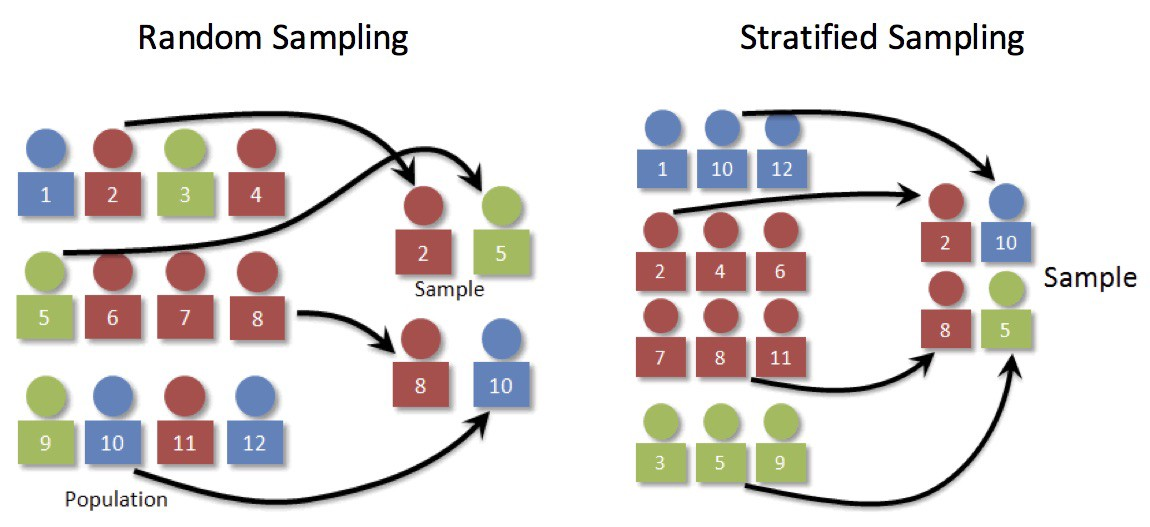

In [57]:
y_raw.value_counts()

negative.        2723
hyperthyroid.      62
T3 toxic.           8
goitre.             7
Name: 29, dtype: int64

In [58]:
y_valid.value_counts()

negative.        551
hyperthyroid.      8
T3 toxic.          1
Name: 29, dtype: int64

## k-fold Cross-validation

Also, some specific values in the validation set may affect the model performance and hyper parameter choices.


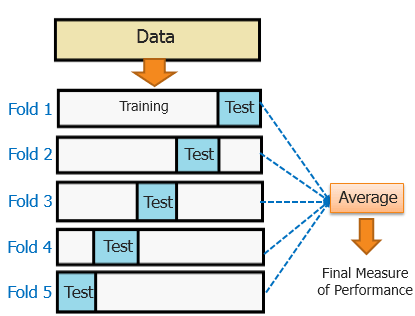

In [59]:
from sklearn.model_selection import cross_val_score

dt = DecisionTreeClassifier(class_weight="balanced",
                                 max_leaf_nodes=20)

scores = cross_val_score(dt, X_train_0, y_train_0, 
                         cv=5, scoring='accuracy', 
                         verbose = 3)
scores.mean()

# for other coring measures see http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

[CV]  ................................................................
[CV] .................................... , score=0.987, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.982, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.978, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.993, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.987, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


0.9852678571428571

In [60]:
from sklearn.model_selection import cross_val_score

dt = DecisionTreeClassifier(class_weight="balanced",
                                 max_leaf_nodes=20)

scores = cross_val_score(dt, X_train_0, y_train_0,
                         cv=5, scoring='recall_macro', 
                         verbose = 3)
scores.mean()

# for other scoring measures see http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.748, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.637, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.636, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.749, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.698, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


0.6936094257715822

## SMOTE oversampling

The minority class is over-sampled by taking each minority class sample and introducing synthetic examples along the line segments joining any/all of the $k$ minority class nearest neighbors.

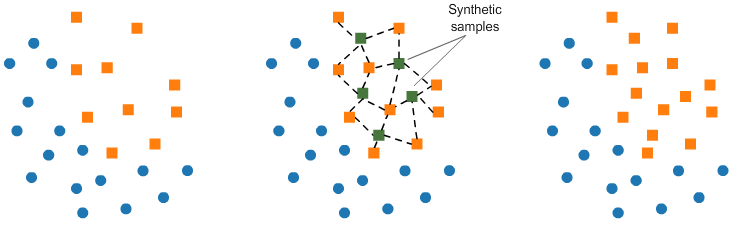

In [61]:
# on linux/Mac
import sys, os
!{sys.executable} -m pip install imblearn --user

In [62]:
# on windows
!pip install imblearn 

In [63]:
from imblearn.over_sampling import SMOTE

oversampler = SMOTE(k_neighbors=3)
X_res, y_res = oversampler.fit_sample(X_train_0, y_train_0)

print (X_train_0.shape)
print (np.unique(y_train_0, return_counts=True))
print (X_res.shape)
print (np.unique(y_res, return_counts=True))

KeyError: 'Only the Series name can be used for the key in Series dtype mappings.'

## How to properly embed this into cross-validation ?

## Pipeline

The `imblearn.pipeline` properly implements a pipeline of data transformation and learning. It takes care of oversampling only the training data and not the test data.

The pipeline is borrowed from Scikit-learn. But sci-kit learn applies the same transformation both to train and test sets.

In [64]:
from imblearn.pipeline import Pipeline

def accuracies_vary_max_leaves(X_train, y_train,
                               l_min=5, l_max=50, l_step=1):

    accuracies = []

    for max_leaves in range(l_min, l_max, l_step):
        # train and predict
        oversampler = SMOTE(k_neighbors=2)
        dt = DecisionTreeClassifier(max_leaf_nodes=max_leaves)
        pipeline = Pipeline([('smote', oversampler), ('tree', dt)])

        # compute Training Accuracy
        scores = cross_val_score(pipeline, X_train, y_train, 
                         cv=5, scoring='accuracy')

        accuracies += [ [max_leaves, scores.mean()] ]

    accuracies = np.array(accuracies)

    fig, ax = plt.subplots()
    ax.plot(accuracies[:,0], accuracies[:,1], "o:", label="X-validation")
    ax.legend()
    ax.grid()
    fig.show()
    
    return accuracies


C:\Users\ricca\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'Only the Series name can be used for the key in Series dtype mappings.'

  FitFailedWarning)
C:\Users\ricca\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'Only the Series name can be used for the key in Series dtype mappings.'

  FitFailedWarning)
C:\Users\ricca\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'Only the Series name can be used for the key in Series dtype mappings.'

  FitFailedWarning)
C:\Users\ricca\Anaconda3\lib\site-pac

C:\Users\ricca\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'Only the Series name can be used for the key in Series dtype mappings.'

  FitFailedWarning)
C:\Users\ricca\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'Only the Series name can be used for the key in Series dtype mappings.'

  FitFailedWarning)
C:\Users\ricca\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'Only the Series name can be used for the key in Series dtype mappings.'

  FitFailedWarning)
C:\Users\ricca\Anaconda3\lib\site-pac

C:\Users\ricca\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'Only the Series name can be used for the key in Series dtype mappings.'

  FitFailedWarning)
C:\Users\ricca\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'Only the Series name can be used for the key in Series dtype mappings.'

  FitFailedWarning)
C:\Users\ricca\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'Only the Series name can be used for the key in Series dtype mappings.'

  FitFailedWarning)
C:\Users\ricca\Anaconda3\lib\site-pac

C:\Users\ricca\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'Only the Series name can be used for the key in Series dtype mappings.'

  FitFailedWarning)
C:\Users\ricca\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'Only the Series name can be used for the key in Series dtype mappings.'

  FitFailedWarning)
C:\Users\ricca\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'Only the Series name can be used for the key in Series dtype mappings.'

  FitFailedWarning)
C:\Users\ricca\Anaconda3\lib\site-pac

C:\Users\ricca\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'Only the Series name can be used for the key in Series dtype mappings.'

  FitFailedWarning)
C:\Users\ricca\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'Only the Series name can be used for the key in Series dtype mappings.'

  FitFailedWarning)
C:\Users\ricca\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'Only the Series name can be used for the key in Series dtype mappings.'

  FitFailedWarning)
C:\Users\ricca\Anaconda3\lib\site-pac

C:\Users\ricca\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'Only the Series name can be used for the key in Series dtype mappings.'

  FitFailedWarning)
C:\Users\ricca\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'Only the Series name can be used for the key in Series dtype mappings.'

  FitFailedWarning)
C:\Users\ricca\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'Only the Series name can be used for the key in Series dtype mappings.'

  FitFailedWarning)
C:\Users\ricca\Anaconda3\lib\site-pac

C:\Users\ricca\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'Only the Series name can be used for the key in Series dtype mappings.'

  FitFailedWarning)
C:\Users\ricca\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'Only the Series name can be used for the key in Series dtype mappings.'

  FitFailedWarning)
C:\Users\ricca\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'Only the Series name can be used for the key in Series dtype mappings.'

  FitFailedWarning)
C:\Users\ricca\Anaconda3\lib\site-pac

C:\Users\ricca\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'Only the Series name can be used for the key in Series dtype mappings.'

  FitFailedWarning)
C:\Users\ricca\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'Only the Series name can be used for the key in Series dtype mappings.'

  FitFailedWarning)
C:\Users\ricca\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'Only the Series name can be used for the key in Series dtype mappings.'

  FitFailedWarning)
C:\Users\ricca\Anaconda3\lib\site-pac

<IPython.core.display.Javascript object>


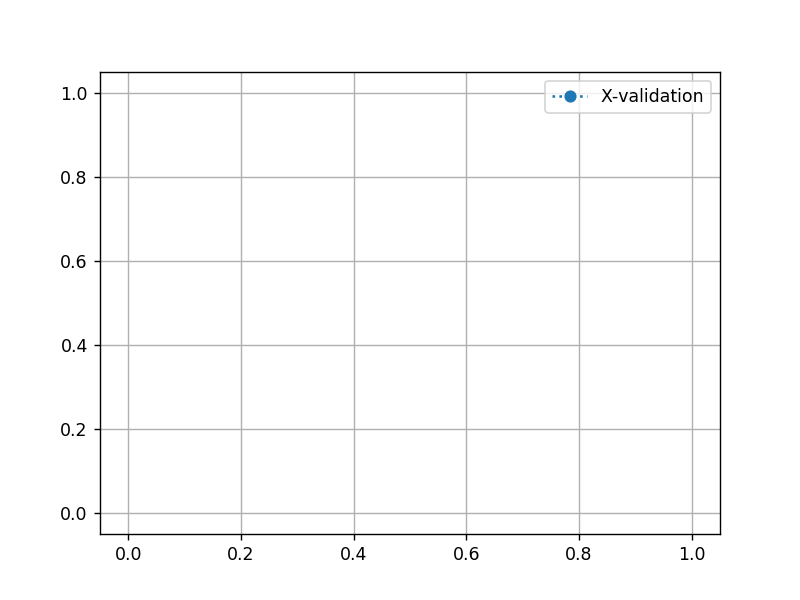

[ 5. nan]


In [65]:
accs = accuracies_vary_max_leaves(X_train_0, y_train_0)
print (max(accs, key=lambda x:x[-1]))

In [66]:
from sklearn.metrics import confusion_matrix, classification_report

# train and predict
oversampler = SMOTE(k_neighbors=2)
dt = DecisionTreeClassifier(max_leaf_nodes=40)
pipeline = Pipeline([('smote', oversampler), ('tree', dt)])

pipeline.fit(X_train_0,y_train_0)

test_acc = accuracy_score(y_true=y_test, y_pred=pipeline.predict(X_test))

print ("Test Acc:", test_acc)

class_rep = classification_report(y_true=y_test, y_pred=pipeline.predict(X_test))
print (class_rep)

conf_stat = confusion_matrix(y_true=y_test, y_pred=pipeline.predict(X_test))

import seaborn as sns
fig, ax = plt.subplots(figsize=(5,5), tight_layout=True)
sns.heatmap(conf_stat, annot=True, fmt=".3f", 
            linewidths=.5, square = True, 
            cmap = 'Blues_r',cbar=False,
            xticklabels=pipeline.classes_,
            yticklabels=pipeline.classes_);
ax.set_ylabel('True Label', fontsize=14);
ax.set_xlabel('Predicted Label', fontsize=14);


KeyError: 'Only the Series name can be used for the key in Series dtype mappings.'

## Summary

- Validation set should be used to find the best training hyper-parameters.

- A more robust estimation is achieved by k-fold cross-validation.

- We investigated the following hyper-parameters:
  - max number of leaves
  - weighting of training instances
  - SMOTE synthetic generation of training instances

- After cross validation, the full dataset can be used to build the final model.

## Exercise

The original dataset (Url: http://archive.ics.uci.edu/ml/datasets/thyroid+disease) provides an additional (labeled) test set.

Some of the above training strategies lead to different tuning parameters.

Compare weighing vs. SMOTE by using the full training dataset to tune parameters (with cross-validation) and then evaluate the final model on the test dataset.

**NOTE:** The same transformations (e.g., one hot encoding) should be applied to both the training and test dataset. Store the classes corresponding to those transformations so that they can be applied to the test set. Another option is to exploit the scikit-learn Pipeline.

## References

- **Data Mining Concepts and Techniques Third Edition**. Jiawei Han, Micheline Kamber Jian Pei.  Morgan Kaufmann/Elsevier. Third Edition. 2012.
  - Chapter 8.5 Model Evaluation and Selection, excluding 8.5.4 and 8.5.5
  - Section 8.6.5 Improving Classification Accuracy of Class-Imbalanced Data
  